In [1]:
from cae import cae
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Load MNIST Dataset

In [2]:
# load MNIST dataset
import urllib, gzip, pickle

mnistfile = 'mnist.pkl.gz'
if not os.path.isfile(mnistfile):
    url = urllib.request.URLopener()
    url.retrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", mnistfile)
f = gzip.open(mnistfile, 'rb')

training_set, validation_set, testing_set = pickle.load(f, encoding='latin1')

f.close()

X_train,    y_train    = training_set
X_validate, y_validate = validation_set
X_test,     y_test     = testing_set

In [3]:
def reshape_mnist(vectors):
    images = np.reshape(vectors, (-1,28,28,1))
    return images

In [4]:
X_train    = reshape_mnist(X_train)
X_validate = reshape_mnist(X_validate)
X_test     = reshape_mnist(X_test)

In [5]:
def plot_many(images, n=[2,6]):
    plt.figure(figsize=(12,4))
    for i in range(n[0]):
        for j in range(n[1]):
            plt.subplot(n[0], n[1], j*n[0]+i+1)
            plt.imshow(images[np.random.randint(0, images.shape[0]-1),:,:,0], cmap=plt.get_cmap("Greys"))
            plt.axis('off')

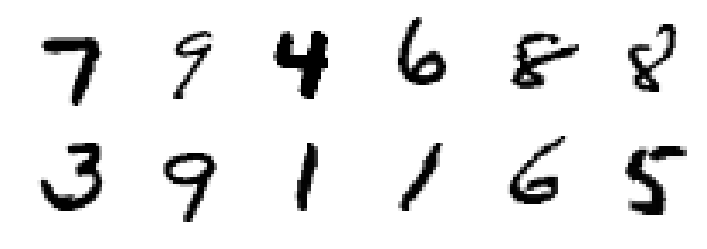

In [6]:
plot_many(X_train)

# Test CAE on MNIST

In [28]:
# initialize ConvAutoEncoder model
model = cae(input_shape=(X_train.shape[1], X_train.shape[2],1),
            output_dim=10, filters=[32,64])

# fit to training, validation data
model.fit(X_train, epochs=20, validation_data=X_validate)
model.save_weights()

CAE MSE on validation data:  0.0155416706353


In [23]:
# predict on testing data
test_codes = model.encode(X_test)

In [24]:
# run tSNE on testing codes
from sklearn.manifold import TSNE
test_codes_embedded = TSNE(n_components=2).fit_transform(test_codes)

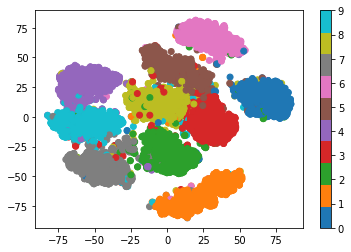

In [25]:
# plot tSNE results with MNIST labels
fig, ax = plt.subplots()
plt.scatter(test_codes_embedded[:,0], test_codes_embedded[:,1], c=y_test, cmap=plt.get_cmap("tab10"))
plt.colorbar()

In [26]:
def plot_many_vs_reconstructed(original, reconstructed, n=10):
    plt.figure(figsize=(12,4))
    n = [2,n]
    for i in range(n[1]):
        idx = np.random.randint(0, original.shape[0]-1)
        plt.subplot(n[0], n[1], i+1)
        plt.imshow(original[idx,:,:,0], cmap=plt.get_cmap("Greys"))
        plt.axis('off')
        plt.subplot(n[0], n[1], i+1+n[1])
        plt.imshow(reconstructed[idx,:,:,0], cmap=plt.get_cmap("Greys"))
        plt.axis('off')

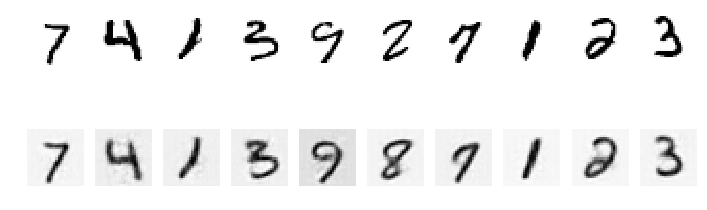

In [27]:
# compare original and reconstructed images
test_reconstructed = model.decode(test_codes)

plot_many_vs_reconstructed(X_test, test_reconstructed)